# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING
Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.
Tasks:
1. Data Exploration and Preprocessing:
•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
•	Handle missing values as per the best practices (imputation, removal, etc.).
•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling
•	Discuss the scenarios where each scaling technique is preferred and why.
2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.
3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.
4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


1. Data Exploration and Preprocessing:
•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
•	Handle missing values as per the best practices (imputation, removal, etc.).
•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling
•	Discuss the scenarios where each scaling technique is preferred and why.

In [1]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler  ,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df=pd.read_csv("adult_with_headers.csv")

In [3]:
df.head(50)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:
# Select numerical columns for scaling
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [8]:
# Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

In [9]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])


In [10]:
df_minmax_scaled.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


In [11]:
# Display the first few rows of scaled datasets
df_standard_scaled.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


#Discuss the scenarios where each scaling technique is preferred and why.

MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within
the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the
shape of the dataset (no distortion).


StandardScaler() will transform each value in the column to range about the mean 0 and standard
deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard
deviation. Use StandardScaler if you know the data distribution is normal.


StandardScaler removes the mean and scales the data to unit variance. However, the outliers have an
influence when computing the empirical mean and standard deviation which shrink the range of the
feature values as shown in the left figure below. Note in particular that because the outliers on
each feature have different magnitudes, the spread of the transformed data on each feature is very
different: most of the data lie in the [-2, 4] range for the transformed median income feature while
the same data is squeezed in the smaller [-0.2, 0.2] range for the transformed number of
households.

StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.

MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] as shown
in the right panel below. However, this scaling compress all inliers in the narrow range [0, 0.005]
for the transformed number of households.

Many machine learning algorithms perform better when numerical input variables are scaled to a
standard range. Scaling the data means it helps to Normalize the data within a particular range.

When MinMaxScaler is used the it is also known as Normalization and it transform all the values
in range between (0 to 1) formula is x = [(value - min)/(Max- Min)]

StandardScaler comes under Standardization and its value ranges between (-3 to +3)
formula is z = [(x - x.mean)/Std_deviation]



StandardScaler rescales a dataset to have a mean of 0 and a standard deviation of
1. Standardization is very useful if data has varying scales and the algorithm assumption
about data having a gaussian distribution.

Normalization or MinMaxScaler rescale a dataset so that each value fall between 0 and 1.
It is useful when data has varying scales and the algorithm does not make assumptions about the
distribution. It is a good technique when we did not know about the distribution of data or when
we know the distribution is not gaussian.

MinMaxScaler
Transforms data to a specified range (usually 0 to 1).
Preserves the relative distances between data points.
Suitable for:
Data where the original range is meaningful (e.g., image pixel values, probability values).
When you want to maintain the shape of the distribution (e.g., for algorithms that rely on distance-based calculations).
StandardScaler
Transforms data to have a mean of 0 and a standard deviation of 1.
Removes the influence of scale and shifts the data to a standard normal distribution.
Suitable for:
Data where the original range is not meaningful or when you want to standardize features for algorithms that assume normally distributed data (e.g., many statistical models).
Choosing the Right Technique:

Data Distribution:

If your data is skewed or has outliers, MinMaxScaler might be preferable as it preserves the shape of the distribution.
If your data is approximately normally distributed, StandardScaler can be a good choice.
Algorithm Requirements:

Some algorithms (e.g., k-nearest neighbors, support vector machines) assume standardized data.
Others (e.g., decision trees, random forests) might be less sensitive to scaling.
Interpretation:

MinMaxScaler preserves the original scale, making it easier to interpret the transformed values.
StandardScaler removes the original scale, making interpretation more difficult.

# 2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

In [12]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [13]:
# Identify categorical columns

categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [14]:
df.nunique()

,0
age,73
workclass,9
fnlwgt,21648
education,16
education_num,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2


In [15]:
# Apply One-Hot Encoding to columns with less than 5 categories
one_hot_cols = [col for col in categorical_cols if df[col].nunique() < 5]
df_copy=df
df_copy = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)
print(one_hot_cols)
df

['sex', 'income']


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
# Apply Label Encoding to columns with 5 or more categories
label_encoder = LabelEncoder()
label_encoded_cols = [col for col in categorical_cols if df[col].nunique() >= 5]

for col in label_encoded_cols:
    df_copy[col] = label_encoder.fit_transform(df[col])
print(label_encoded_cols)
df_copy.head(5)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0


# One-Hot Encoding vs. Label Encoding
One-Hot Encoding and Label Encoding are two common techniques used to convert categorical data into a numerical format that can be understood by machine learning algorithms. Let's discuss their pros and cons:

One-Hot Encoding

Pros:

1 Preserves categorical nature: Does not treat categories as ordinal, which is important when categories have no inherent order.
2 Handles multiple categories: Can handle categorical variables with more than two categories.
3 Suitable for most algorithms: Works well with most machine learning algorithms, including those that assume numerical data.


Cons:

1 Creates additional features: Increases the dimensionality of the dataset, which can lead to the curse of dimensionality.
2 Sparse representation: Creates sparse matrices, which can be inefficient for some algorithms.


Label Encoding
Pros:

1 Reduces dimensionality: Does not increase the dimensionality of the dataset.
2 Simple to implement: Easy to understand and implement.


Cons:

1 Assumes ordinality: Treats categories as ordinal, which can be misleading if categories do not have a natural order.
2 Can introduce bias: If the algorithm assumes an ordinal relationship between categories, it can introduce bias.


Choosing the Right Technique:

1 Nominal Data: Use One-Hot Encoding if the categories are nominal (no inherent order).
2 Ordinal Data: Use Label Encoding if the categories have a natural order.
3 Consider dimensionality: If dimensionality is a concern, Label Encoding might be preferable. However, be cautious about assuming ordinality.

# 3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [17]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [18]:
#Rationale: Create a feature by subtracting capital_loss from capital_gain.
#This feature, capital_diff gives the net profit or loss

df_copy['capital_diff'] = df['capital_gain'] - df['capital_loss']

df_copy['capital_diff']

,capital_diff
0,2174
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,0
32559,0


In [19]:
#Age Bins:
#Rationale: Categorize age into bins (e.g., young, middle-aged, senior) to help the model
#capture age-related trends.
df_copy['age_group'] = pd.cut(df['age'], bins=[0, 25, 50, 75, 100], labels=['young', 'middle-aged', 'senior', 'elderly'])
df_copy['age_group']

,age_group
0,middle-aged
1,middle-aged
2,middle-aged
3,senior
4,middle-aged
...,...
32556,middle-aged
32557,middle-aged
32558,senior
32559,young


# Handling Skewed Numerical Features

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [22]:
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

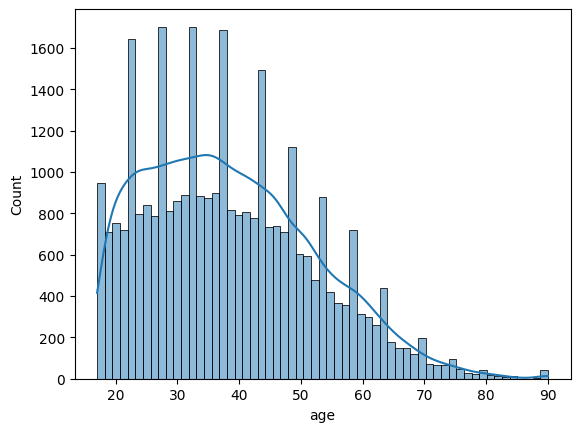

In [23]:
sns.histplot(df['age'], kde=True)

In [24]:
#Apply a transformation (e.g., log transformation) to at least one skewed numerical feature
#and justify your choice.
#as visible in the above histplot right skewed data is there so we are applying log transformation on
#this to remove the skewness of the distribution
df['log_age'] = np.log1p(df['age'])

Text(0.5, 1.0, 'Log-Transformed Age Distribution')

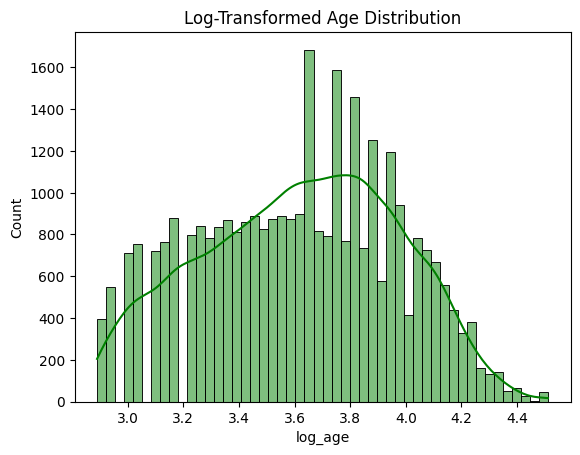

In [25]:
sns.histplot(df['log_age'], kde=True, color='green')
plt.title('Log-Transformed Age Distribution')

#As visible in the below hisplot skewness of the age column is reduced to that extend like almost
#negligible so choosing the  age column  which has skewness and seeing the results of the log
#transformation  we can say that it is a good  decision

<Axes: xlabel='fnlwgt', ylabel='Count'>

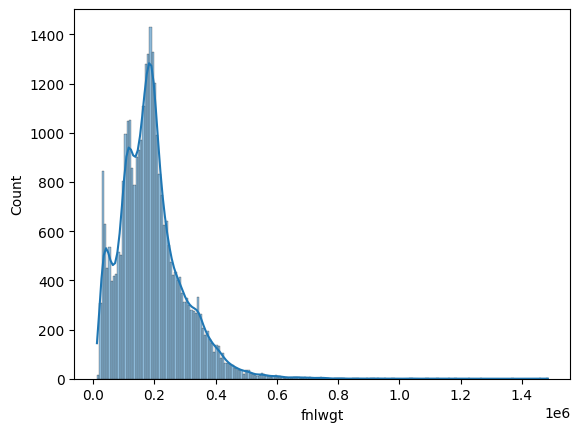

In [26]:
sns.histplot(df['fnlwgt'], kde=True)

Text(0.5, 1.0, 'Log-Transformed fnlwgt Distribution')

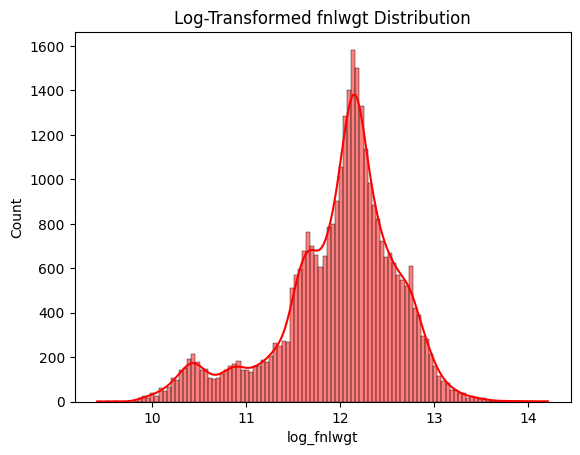

In [27]:

df['log_fnlwgt'] = np.log1p(df['fnlwgt'])
sns.histplot(df['log_fnlwgt'], kde=True, color='red')
plt.title('Log-Transformed fnlwgt Distribution')

In [28]:
#As visible in the below hisplot skewness of the fnlwgt column is reduced to that extend like almost
#became negligible so choosing the  fnlwgt column  which has skewness and seeing the results of the
#log transformation  we can say that it is a good  decision

# 4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


# Isolation Forest for Outlier Detection

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [30]:
df['index'] = df.index

In [31]:
# Reshape the data since Isolation Forest expects 2D input
data = df[['age']].values.reshape(-1, 1)

In [32]:
# Create and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['outlier'] = iso_forest.fit_predict(data)

Text(0, 0.5, 'age')

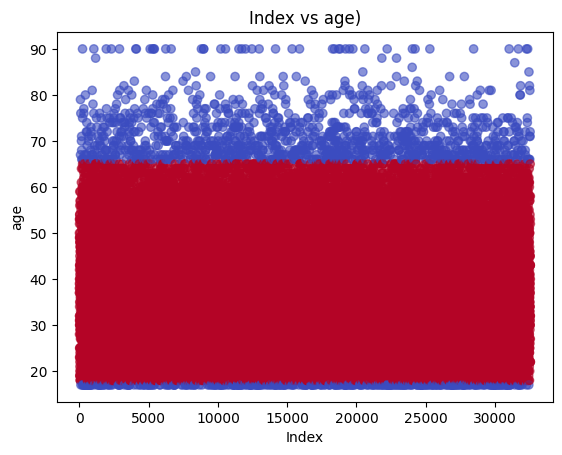

In [33]:
# Visualizing the 'age' column with outliers
plt.scatter(df['index'], df['age'], c=df['outlier'], cmap='coolwarm', alpha=0.6)
plt.title(f'Index vs age)')
plt.xlabel('Index')
plt.ylabel('age')

In [34]:
df['outlier']

,outlier
0,1
1,1
2,1
3,1
4,1
...,...
32556,1
32557,1
32558,1
32559,1


In [35]:

df_outliers_cleaned=df[df['outlier']==1]
df_outliers_cleaned

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_age,log_fnlwgt,index,outlier
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,3.688879,11.258253,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,3.931826,11.330348,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,3.663562,12.281398,2,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,3.988984,12.366157,3,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,3.367296,12.732013,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,3.332205,12.458010,32556,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,3.713572,11.947140,32557,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,4.077537,11.931050,32558,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,3.135494,12.213500,32559,1


In [37]:
# • Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [38]:
#pip install ppscore --user


In [40]:
import ppscore as pps

In [41]:

pps_matrix=pps.matrix(df_outliers_cleaned)
pps_matrix[pps_matrix['ppscore']>0.2]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000e+00,None
5,age,marital_status,0.299467,classification,True,weighted F1,0.343400,5.400303e-01,DecisionTreeClassifier()
15,age,log_age,1.000000,regression,True,mean absolute error,0.270659,3.324452e-15,DecisionTreeRegressor()
20,workclass,workclass,1.000000,predict_itself,True,None,0.000000,1.000000e+00,None
40,fnlwgt,fnlwgt,1.000000,predict_itself,True,None,0.000000,1.000000e+00,None
54,fnlwgt,log_fnlwgt,0.998778,regression,True,mean absolute error,0.472666,5.776765e-04,DecisionTreeRegressor()
60,education,education,1.000000,predict_itself,True,None,0.000000,1.000000e+00,None
61,education,education_num,1.000000,regression,True,mean absolute error,1.824400,0.000000e+00,DecisionTreeRegressor()
71,education,income,0.239368,classification,True,weighted F1,0.650682,7.342976e-01,DecisionTreeClassifier()
79,education_num,education,1.000000,classification,True,weighted F1,0.203400,1.000000e+00,DecisionTreeClassifier()


In [43]:
df_outliers_cleaned.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,log_age,log_fnlwgt,index,outlier
age,1.000000,-0.075165,0.042179,0.077992,0.057240,0.154354,0.986654,-0.059036,0.005392,NaN
fnlwgt,-0.075165,1.000000,-0.049463,0.000442,-0.011534,-0.025433,-0.073691,0.902981,-0.002042,NaN
education_num,0.042179,-0.049463,1.000000,0.119251,0.077695,0.123508,0.068049,-0.044131,-0.001622,NaN
capital_gain,0.077992,0.000442,0.119251,1.000000,-0.031177,0.080018,0.080075,0.003726,0.000277,NaN
capital_loss,0.057240,-0.011534,0.077695,-0.031177,1.000000,0.056107,0.062210,-0.006684,-0.002479,NaN
hours_per_week,0.154354,-0.025433,0.123508,0.080018,0.056107,1.000000,0.196918,-0.030591,0.001063,NaN
log_age,0.986654,-0.073691,0.068049,0.080075,0.062210,0.196918,1.000000,-0.057860,0.004757,NaN
log_fnlwgt,-0.059036,0.902981,-0.044131,0.003726,-0.006684,-0.030591,-0.057860,1.000000,-0.003074,NaN
index,0.005392,-0.002042,-0.001622,0.000277,-0.002479,0.001063,0.004757,-0.003074,1.000000,NaN
outlier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
